In [6]:
import numpy as np, pandas as pd

In [8]:
import os
import dotenv
import sqlalchemy

In [10]:
%run TitanicDB.ipynb

In [12]:
titanic.head()

,PassengerId,PClass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,EmbarkDate
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,,S,0,10-4-1912
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C85,C,1,11-4-1912
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.93,,S,1,10-4-1912
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S,1,10-4-1912
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,,S,0,10-4-1912


Sul database **titanic**, effettuiamo le seguenti analisi:

Riusciamo a calcolare quanti ponti c'erano sulla nave (prima lettera dei dati nella colonna *Cabin*)?

Visualizzare un grafico con il numero di passeggeri di ogni classe di imbarco (colonna *PClass*). 

Fare la stessa cosa per la colonna *Survived*.

Qual era la distribuzione delle tariffe (*Fare*)?

In [15]:
import seaborn as sns

In [17]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   PClass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1309 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1309 non-null   float64
 9   Cabin        1309 non-null   object 
 10  Embarked     1309 non-null   object 
 11  Survived     1309 non-null   int64  
 12  EmbarkDate   1309 non-null   object 
dtypes: float64(2), int64(5), object(6)
memory usage: 133.1+ KB


In [19]:
titanic['Cabin'] = titanic['Cabin'].replace('', None)
# Sostituisco i valori nulli impliciti con None

In [21]:
titanic['Cabin'].value_counts().sum()
# Potrebbe essere questo un potenziale output?

295

<Axes: xlabel='PClass', ylabel='count'>

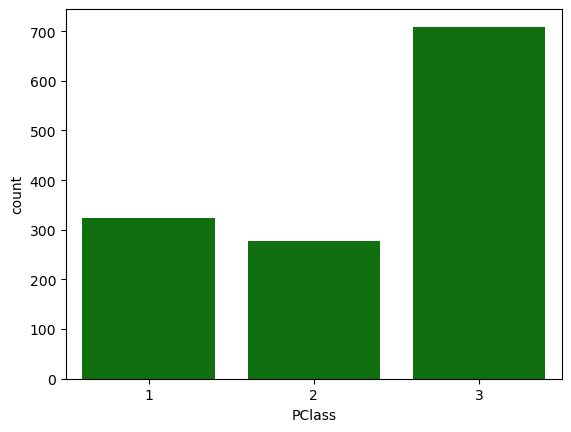

In [23]:
sns.countplot(data=titanic, x='PClass', color='green')

In [25]:
titanic.groupby('PClass')['PassengerId'].count()

PClass
1    323
2    277
3    709
Name: PassengerId, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

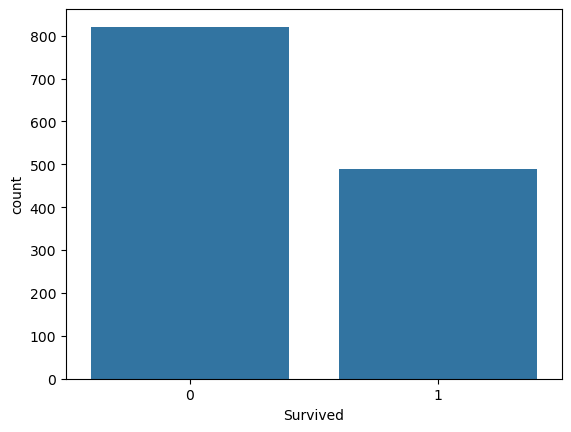

In [27]:
sns.countplot(data=titanic, x='Survived')

In [29]:
titanic.groupby('Survived')['PassengerId'].count()

Survived
0    821
1    488
Name: PassengerId, dtype: int64

In [31]:
titanic.groupby('PClass')['Fare'].mean().round(2)

PClass
1    87.51
2    21.18
3    13.29
Name: Fare, dtype: float64

<Axes: xlabel='PClass', ylabel='Fare'>

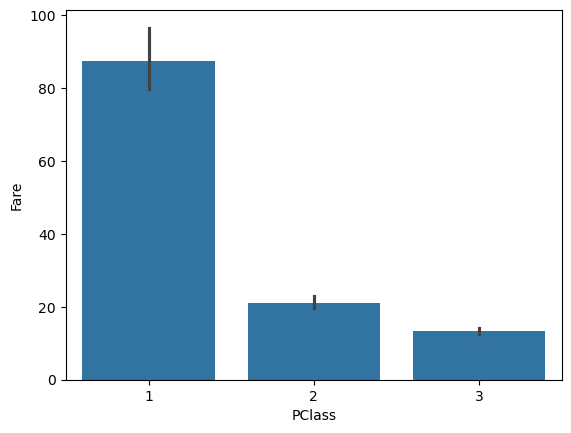

In [33]:
sns.barplot(x='PClass', y='Fare', data=titanic, estimator='mean')

(0.0, 600.0)

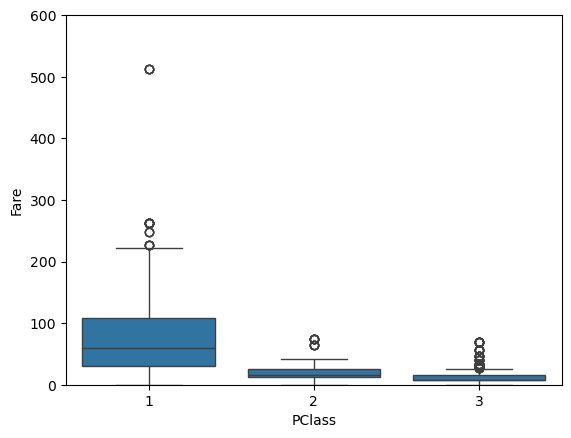

In [35]:
boxplot_titanic = sns.boxplot(x='PClass', y='Fare', data=titanic)
boxplot_titanic.set_ylim(0, 600)
# Setto un limite di valori sull'asse delle ordinate

In [37]:
titanic['Fare'].describe().round(2)

count    1309.00
mean       33.27
std        51.75
min         0.00
25%         7.90
50%        14.45
75%        31.28
max       512.33
Name: Fare, dtype: float64

Riusciamo a vedere la distribuzione delle età dei passeggeri rispetto alla classe di imbarco con un **boxplot**?

Visualizziamo un **boxplot** rispetto alle colonne *Fare* e *Survived*; che cosa ne deduciamo?

<Axes: xlabel='PClass', ylabel='Age'>

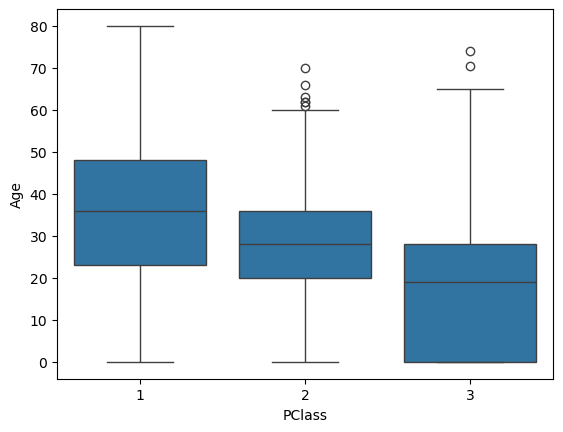

In [40]:
sns.boxplot(data=titanic, x='PClass', y='Age')

In [42]:
titanic.groupby('PClass')['Age'].mean().round()

PClass
1    34.0
2    28.0
3    18.0
Name: Age, dtype: float64

In [44]:
titanic.columns

Index(['PassengerId', 'PClass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived', 'EmbarkDate'],
      dtype='object')

<Axes: xlabel='Survived', ylabel='Fare'>

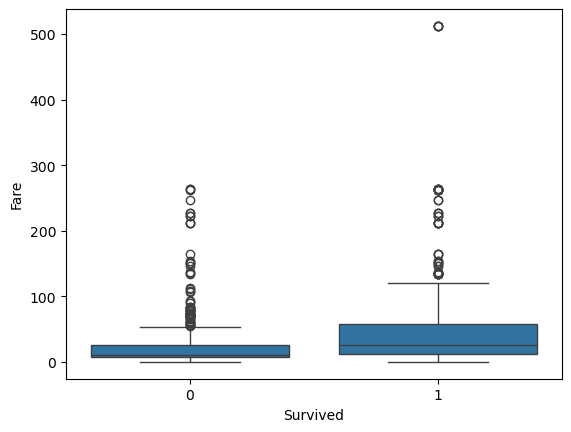

In [46]:
sns.boxplot(data=titanic, x='Survived', y='Fare')

Scarichiamo il dataset **stockdata.csv** da https://github.com/plotly/datasets/blob/master/stockdata.csv.

In [49]:
stockdata = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/stockdata.csv')

In [50]:
stockdata.head()

,MSFT,IBM,SBUX,AAPL,GSPC,Date
0,23.950705,80.517962,16.149666,11.086612,1416.599976,2007-01-03
1,23.910599,81.378851,16.167992,11.332687,1418.339966,2007-01-04
2,23.774242,80.642129,16.099269,11.251984,1409.709961,2007-01-05
3,24.006852,81.867244,16.039710,11.307550,1412.839966,2007-01-08
4,24.030914,82.835742,15.970989,12.246870,1412.109985,2007-01-09


In [51]:
stockdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2306 entries, 0 to 2305
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MSFT    2306 non-null   float64
 1   IBM     2306 non-null   float64
 2   SBUX    2306 non-null   float64
 3   AAPL    2306 non-null   float64
 4   GSPC    2306 non-null   float64
 5   Date    2306 non-null   object 
dtypes: float64(5), object(1)
memory usage: 108.2+ KB


In [55]:
stockdata.columns

Index(['MSFT', 'IBM', 'SBUX', 'AAPL', 'GSPC', 'Date'], dtype='object')

In [57]:
stockdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2306 entries, 0 to 2305
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MSFT    2306 non-null   float64
 1   IBM     2306 non-null   float64
 2   SBUX    2306 non-null   float64
 3   AAPL    2306 non-null   float64
 4   GSPC    2306 non-null   float64
 5   Date    2306 non-null   object 
dtypes: float64(5), object(1)
memory usage: 108.2+ KB


In [59]:
stockdata['Date'] = pd.to_datetime(stockdata['Date'])

In [61]:
stockdata['Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2306 entries, 0 to 2305
Series name: Date
Non-Null Count  Dtype         
--------------  -----         
2306 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 18.1 KB


In [63]:
stockdata.shape

(2306, 6)

Visualizziamo l'andamento delle azioni della Apple (**"AAPL"**).

Visualizziamo l'andamento di tutte le azioni del dataset.


<Axes: >

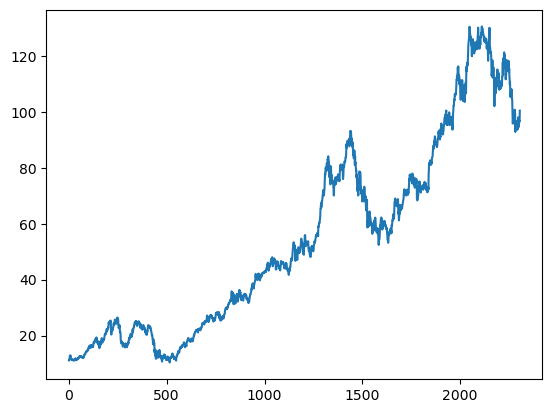

In [66]:
stockdata.AAPL.plot(x='Date')

<Axes: xlabel='Date'>

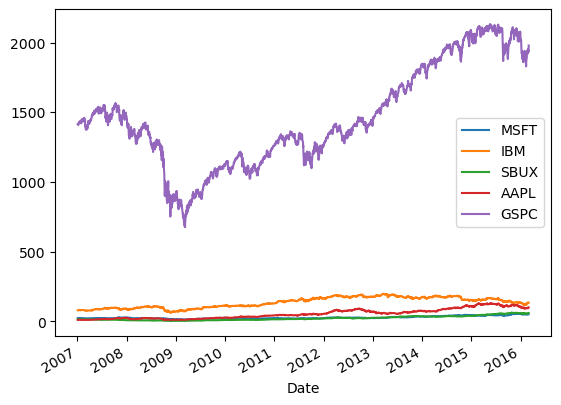

In [68]:
stockdata.plot(x='Date')
# Grafico da approfondire in altro modo

In [70]:
stock_sample = stockdata[['MSFT', 'IBM', 'SBUX', 'AAPL', 'Date']]
# Seleziono solo i titoli di mio interesse

<Axes: xlabel='Date'>

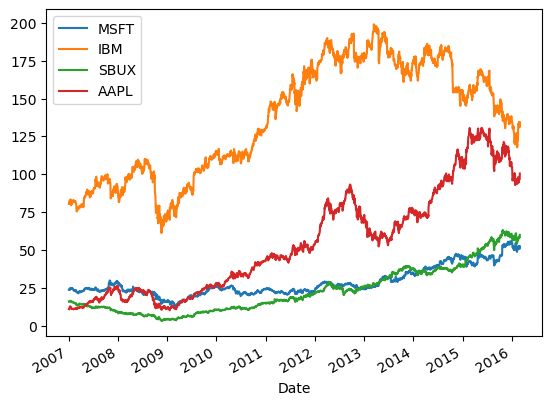

In [72]:
stock_sample.plot(x='Date')

Visualizziamo l'andamento di Microsoft (**"MSFT"**) e IBM (**"IBM"**) negli anni 2012 e 2013.

Con un *istogramma*, troviamo il range di valori che le azioni di Microsoft hanno assunto più spesso.

In [75]:
stock_msft_ibm = stockdata[['MSFT', 'IBM', 'Date']]

In [77]:
filtro_data = stock_msft_ibm['Date'].dt.year.isin([2012,2013])
filtro_12_13 = stock_msft_ibm[filtro_data]
# Sul DF già filtrato per MSFT e IBM vado a filtrare per anno (2012 e 2013)

<Axes: title={'center': 'Andamento azioni MSFT e IBM anni 2012-2013'}, xlabel='Date'>

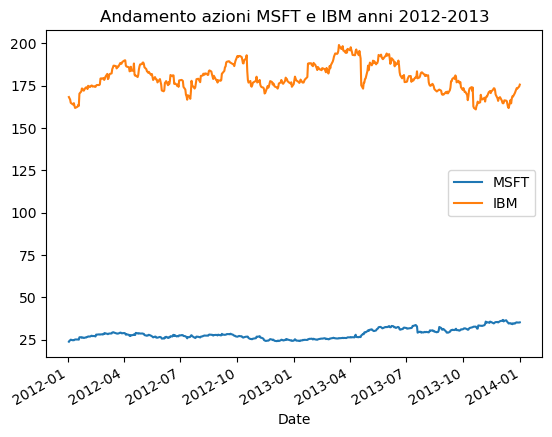

In [79]:
filtro_12_13.plot(title='Andamento azioni MSFT e IBM anni 2012-2013', x='Date')

<Axes: ylabel='Frequency'>

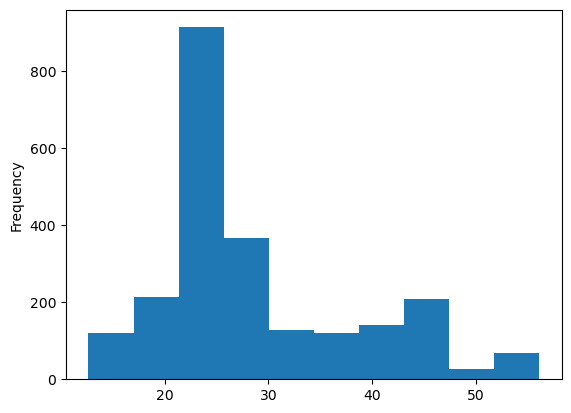

In [81]:
stockdata['MSFT'].plot(kind='hist')

Scarichiamo il dataset **metal_bands_2017.csv** dalla piattaforma.

Con **Seaborn** visualizziamo l'*istogramma* del numero dei fan delle varie band: cosa si vede? Cose ne deduciamo?

In [84]:
metal_bands = pd.read_csv(r'C:\Users\Utente\Desktop\Epicode\Python\Datasets\altri_dataset\metal_bands_2017.csv', encoding='latin1')

In [86]:
metal_bands.head()

,Unnamed: 0,band_name,fans,formed,origin,split,style
0,0,Iron Maiden,4195,1975,United Kingdom,-,"New wave of british heavy,Heavy"
1,1,Opeth,4147,1990,Sweden,1990,"Extreme progressive,Progressive rock,Progressive"
2,2,Metallica,3712,1981,USA,-,"Heavy,Bay area thrash"
3,3,Megadeth,3105,1983,USA,1983,"Thrash,Heavy,Hard rock"
4,4,Amon Amarth,3054,1988,Sweden,-,Melodic death


In [88]:
metal_bands.shape

(5000, 7)

<Axes: xlabel='fans', ylabel='Count'>

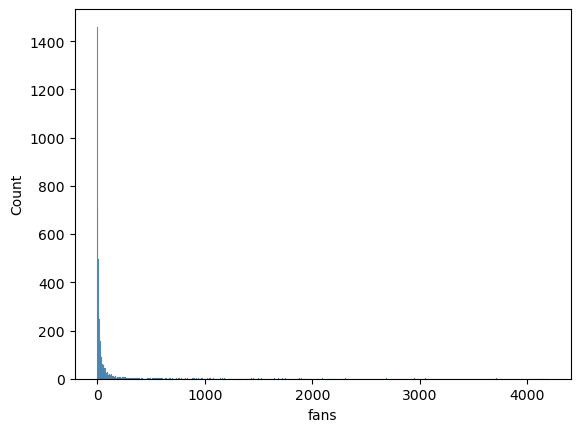

In [90]:
sns.histplot(data= metal_bands, x='fans')

In [91]:
metal_bands.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5000 non-null   int64 
 1   band_name   5000 non-null   object
 2   fans        5000 non-null   int64 
 3   formed      5000 non-null   object
 4   origin      4992 non-null   object
 5   split       5000 non-null   object
 6   style       5000 non-null   object
dtypes: int64(2), object(5)
memory usage: 273.6+ KB


In [92]:
metal_bands.columns

Index(['Unnamed: 0', 'band_name', 'fans', 'formed', 'origin', 'split',
       'style'],
      dtype='object')

In [93]:
band_per_year = metal_bands.groupby('formed')['band_name'].count()

In [98]:
#plt.figure(figsize=(12, 6))
#sns.histplot(band_sample_50, x='band_name',bins=20)

In [100]:
import matplotlib.pyplot as plt

Delle band che suonano sia *Progressive* che *Thrash*, realizziamo un **barplot** che mostri quanti fan ci sono in totale rispetto al paese di origine (nota: in questo caso specifico, per accedere alla colonna "style" dovremo usare **.loc[:, "style"]** e non .style perché quest'ultimo è un metodo).

Visualizziamo un *istogramma* delle date di formazione delle band (potremo dover convertire in qualche modo questo dato): si nota qualche trend?

In [107]:
metal_bands['style'].value_counts().count()

1227

In [109]:
prog_band = metal_bands['style'].str.contains('Progressive')
thr_band = metal_bands['style'].str.contains('Thrash')
filtro_style = prog_band & thr_band

In [111]:
metal_bands[filtro_style].shape

(23, 7)

In [115]:
style_f = metal_bands[filtro_style]

In [119]:
# style_f

In [127]:
style_f.groupby('origin')['fans'].sum()

origin
Albania              2
Canada             265
Finland             11
France               4
Greece               4
Iran                35
Italy               13
Lebanon             10
Norway              69
Portugal             4
Singapore            0
Spain               10
USA               1081
United Kingdom      28
Name: fans, dtype: int64

In [147]:
filter_style = style_f[['fans','origin']]

<Axes: xlabel='origin'>

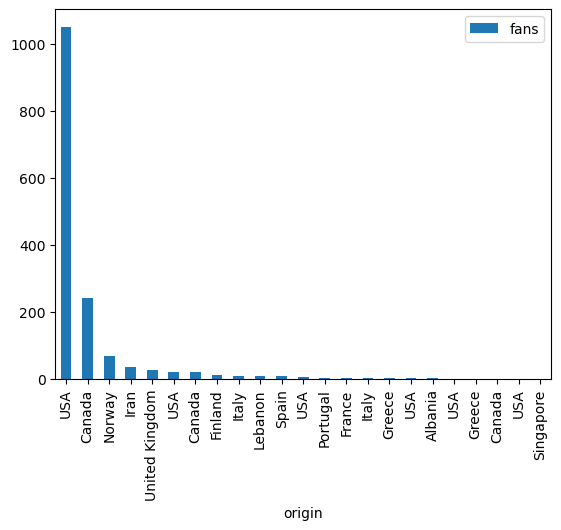

In [151]:
filter_style.plot(kind='bar', x='origin')
# Barplot che mostra il numero di fan per paese d'origine delle band

In [198]:
metal_bands['formed'] = pd.to_datetime(metal_bands['formed'])
metal_bands.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  5000 non-null   int64         
 1   band_name   5000 non-null   object        
 2   fans        5000 non-null   int64         
 3   formed      4996 non-null   datetime64[ns]
 4   origin      4992 non-null   object        
 5   split       5000 non-null   object        
 6   style       5000 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 273.6+ KB


<Axes: ylabel='Frequency'>

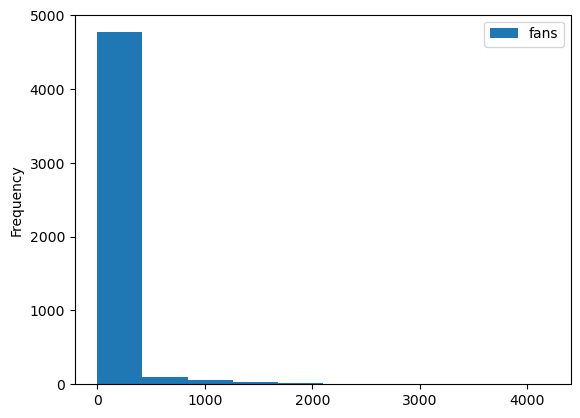

In [200]:
metal_bands[['formed','fans']].plot(kind='hist')

Scarichiamo il dataset **elections.csv** da *https://github.com/plotly/datasets/blob/master/election.csv*.

• Con un *grafico a barre* confrontiamo i voti totali presi dai tre candidati (come somma di tutti i distretti).

• Con un *grafico a barre* confrontiamo il numero di votanti per i primi dieci distretti.

In [203]:
election = pd.read_csv(r'C:\Users\Utente\Desktop\Epicode\Python\Datasets\altri_dataset\election.csv')

In [205]:
election.head()

,district,Coderre,Bergeron,Joly,total,winner,result,district_id
0,101-Bois-de-Liesse,2481,1829,3024,7334,Joly,plurality,101
1,102-Cap-Saint-Jacques,2525,1163,2675,6363,Joly,plurality,102
2,11-Sault-au-Récollet,3348,2770,2532,8650,Coderre,plurality,11
3,111-Mile-End,1734,4782,2514,9030,Bergeron,majority,111
4,112-DeLorimier,1770,5933,3044,10747,Bergeron,majority,112


In [207]:
election.shape

(58, 8)

In [211]:
election.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   district     58 non-null     object
 1   Coderre      58 non-null     int64 
 2   Bergeron     58 non-null     int64 
 3   Joly         58 non-null     int64 
 4   total        58 non-null     int64 
 5   winner       58 non-null     object
 6   result       58 non-null     object
 7   district_id  58 non-null     int64 
dtypes: int64(5), object(3)
memory usage: 3.8+ KB


In [229]:
election_district = election.groupby('district')[['Coderre','Bergeron','Joly',]].sum()

<Axes: xlabel='district'>

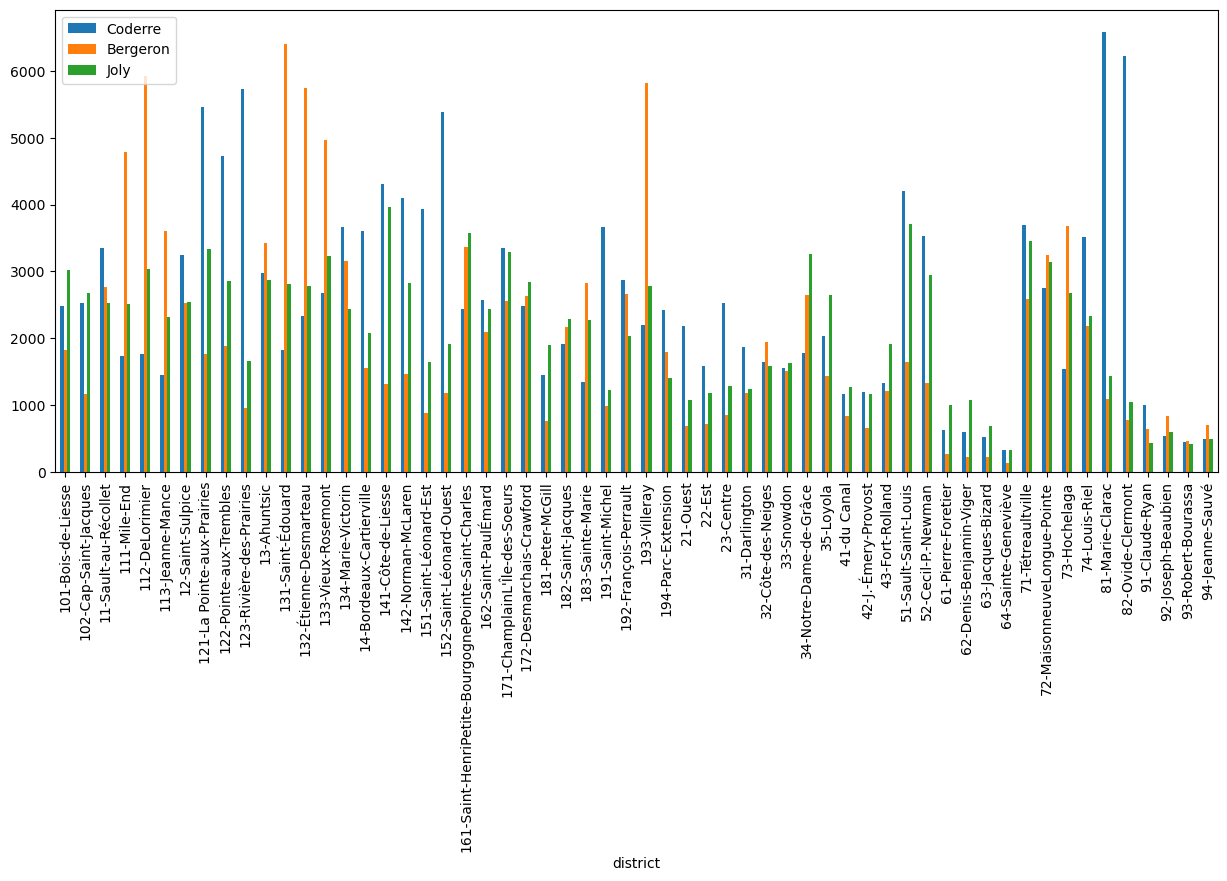

In [233]:
election_district.plot(kind='bar', figsize=(15,6))

In [240]:
_10_districts = election.head(10)

<Axes: xlabel='district'>

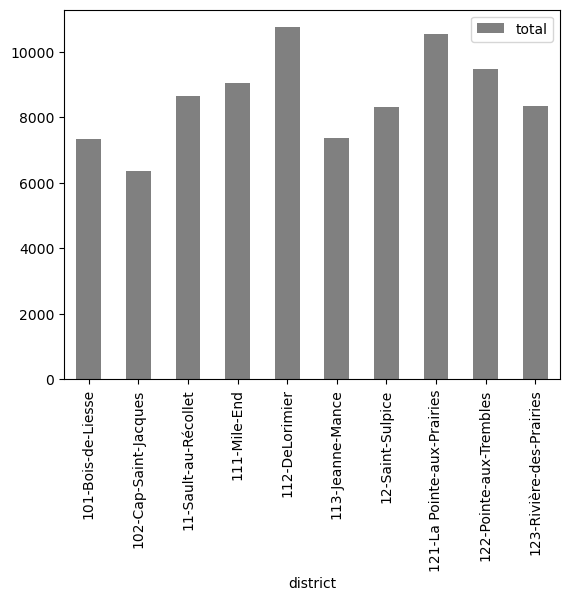

In [246]:
_10_districts[['total','district']].plot(kind='bar', x='district', color='grey')

Scarichiamo i file **party_in_nyc.csv** dal dataset *https://www.kaggle.com/datasets/somesnm/partynyc* relativo a quante volte è stata chiamata la polizia per delle feste eccessivamente rumorose: 

• Realizziamo un *grafico* che mostra quante chiamate ci sono state per ogni città per tutti i tipi di locale.

In [250]:
party_time = pd.read_csv(r'C:\Users\Utente\Desktop\Epicode\Python\Datasets\altri_dataset\party_in_nyc.csv')

In [254]:
party_time

,Created Date,Closed Date,Location Type,Incident Zip,City,Borough,Latitude,Longitude
0,2015-12-31 00:01:15,2015-12-31 03:48:04,Store/Commercial,10034.0,NEW YORK,MANHATTAN,40.866183,-73.918930
1,2015-12-31 00:02:48,2015-12-31 04:36:13,Store/Commercial,10040.0,NEW YORK,MANHATTAN,40.859324,-73.931237
2,2015-12-31 00:03:25,2015-12-31 00:40:15,Residential Building/House,10026.0,NEW YORK,MANHATTAN,40.799415,-73.953371
3,2015-12-31 00:03:26,2015-12-31 01:53:38,Residential Building/House,11231.0,BROOKLYN,BROOKLYN,40.678285,-73.994668
4,2015-12-31 00:05:10,2015-12-31 03:49:10,Residential Building/House,10033.0,NEW YORK,MANHATTAN,40.850304,-73.938516
...,...,...,...,...,...,...,...,...
225409,2016-12-31 23:53:57,2017-01-01 00:01:41,Store/Commercial,10003.0,NEW YORK,MANHATTAN,40.730073,-73.986585
225410,2016-12-31 23:55:01,2017-01-01 02:05:06,Residential Building/House,10032.0,NEW YORK,MANHATTAN,40.833144,-73.944617
225411,2016-12-31 23:56:20,2017-01-01 13:34:00,Residential Building/House,11104.0,SUNNYSIDE,QUEENS,40.743662,-73.923067
225412,2016-12-31 23:56:41,2017-01-01 03:49:12,Residential Building/House,10040.0,NEW YORK,MANHATTAN,40.858447,-73.929279


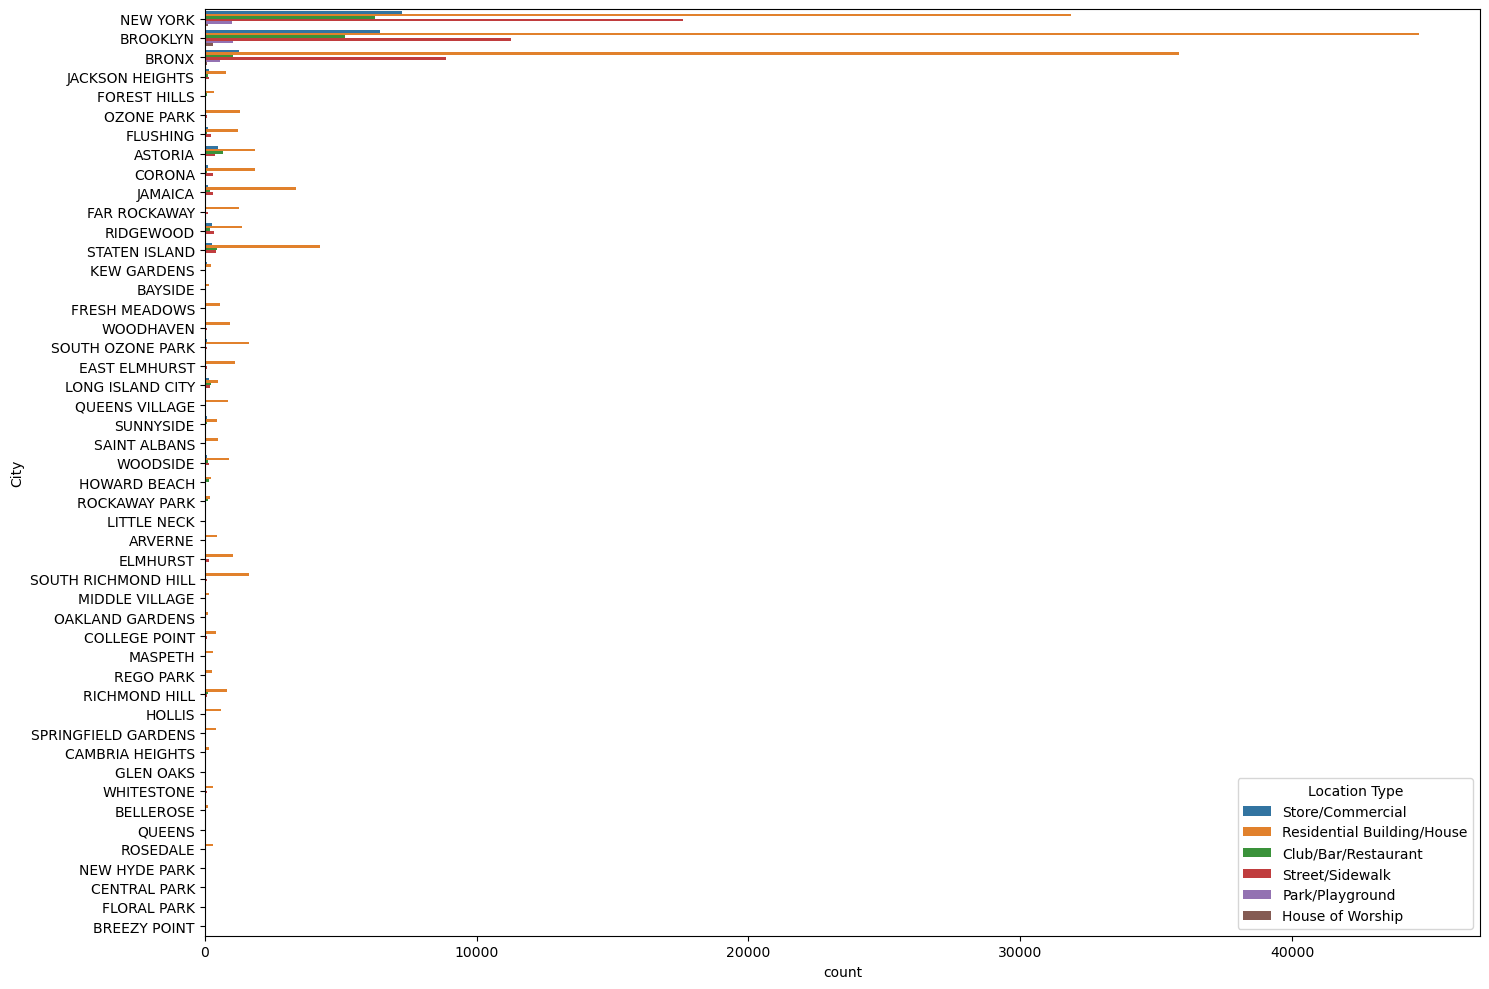

In [273]:
plt.figure(figsize=(15, 10))
sns.countplot(party_time, y='City', hue='Location Type')
plt.tight_layout()

- Qual è il rettangolo di latitudine e longitudine considerato dal dataset? 

- Quante segnalazioni sono state fatte per case private?

- Con Seaborn visualizziamo il conteggio delle segnalazioni avvenute in ogni quartiere; che succede se aggiungiamo il parametro *hue="Location Type"*?

In [278]:
import matplotlib.pyplot as plt

In [290]:
party_time.groupby('Location Type')['City'].count()

Location Type
Club/Bar/Restaurant            15747
House of Worship                 602
Park/Playground                 3024
Residential Building/House    145586
Store/Commercial               17535
Street/Sidewalk                41930
Name: City, dtype: int64

<Axes: xlabel='count', ylabel='Location Type'>

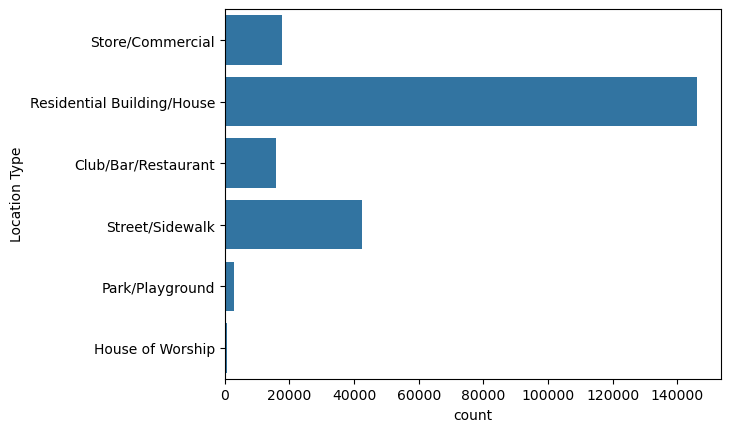

In [286]:
sns.countplot(party_time, y='Location Type')

<Axes: xlabel='count', ylabel='Borough'>

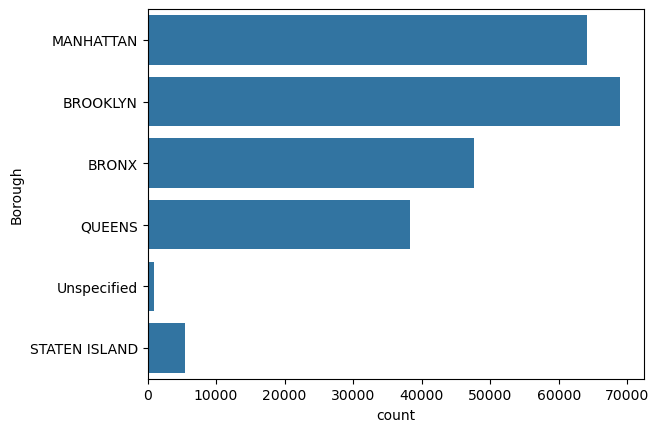

In [282]:
sns.countplot(data = party_time, y='Borough')

<Axes: xlabel='count', ylabel='Borough'>

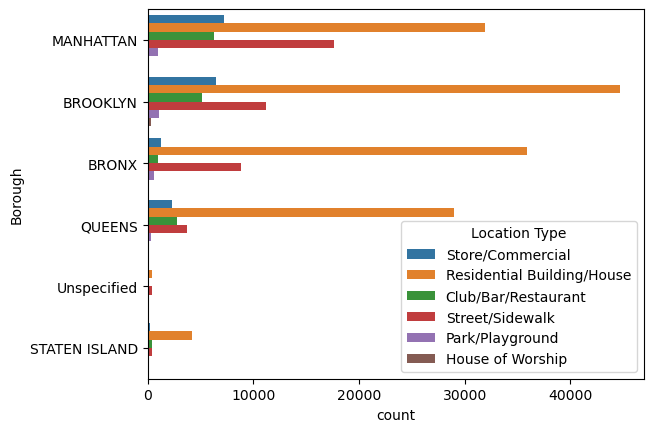

In [280]:
sns.countplot(data = party_time, y='Borough', hue='Location Type')